In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [99]:
!pip install ucimlrepo

In [93]:
from google.colab import files
uploaded = files.upload()


Saving water_potability.csv to water_potability.csv


In [199]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
import time
import matplotlib.pyplot as plt

In [94]:
#df = pd.read_csv('water_potability.csv')

In [148]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
dry_bean_dataset = fetch_ucirepo(id=602)

# data (as pandas dataframes)
X = dry_bean_dataset.data.features
y = dry_bean_dataset.data.targets

# metadata
print(dry_bean_dataset.metadata)

# variable information
print(dry_bean_dataset.variables)


{'uci_id': 602, 'name': 'Dry Bean Dataset', 'repository_url': 'https://archive.ics.uci.edu/dataset/602/dry+bean+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/602/data.csv', 'abstract': 'Images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. A total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 13611, 'num_features': 16, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C50S4B', 'creators': [], 'intro_paper': {'title': 'Multiclass classification of dry beans using computer vision and machine learning techniques', 'authors': 'M. Koklu, Ilker Ali Özkan', 'published_in': 'Computers and El

In [149]:
X

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


In [138]:
#y = X.iloc[:, -1]   # The last column
#X = X.iloc[:, :-1]  # All columns except the last one

In [150]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [151]:
X

array([[0.03405267, 0.05857388, 0.04426214, ..., 0.83304873, 0.75099637,
        0.98061988],
       [0.03550018, 0.07755673, 0.03047881, ..., 0.96731556, 0.88498696,
        0.97497943],
       [0.03825855, 0.06803484, 0.05263303, ..., 0.80094221, 0.7361995 ,
        0.98719586],
       ...,
       [0.09273856, 0.16060492, 0.17638393, ..., 0.42701907, 0.4722397 ,
        0.9430251 ],
       [0.09277272, 0.16365701, 0.17970258, ..., 0.41532984, 0.45691893,
        0.91334232],
       [0.09282396, 0.16944765, 0.20088207, ..., 0.34689176, 0.36476185,
        0.9701623 ]])

In [152]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [153]:
y.shape

(13611, 7)

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [155]:
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [156]:
y_validation.shape

(2042, 7)

In [157]:
labels = np.argmax(y_validation, axis=1)
unique_values, counts = np.unique(labels, return_counts=True)

# Display the unique values and their counts
for value, count in zip(unique_values, counts):
    print(f"Value {value}: Count {count}")

Value 0: Count 198
Value 1: Count 78
Value 2: Count 239
Value 3: Count 509
Value 4: Count 301
Value 5: Count 323
Value 6: Count 394


#Model 1 - No Regularization and Adam Optimizer

In [158]:
X_train.shape

(9527, 16)

In [167]:
# Build the model
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(7, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

start_time1 = time.time()

# Train the model
history1 = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_validation, y_validation))

end_time1 = time.time()

# Calculate and display the training time
training_time = end_time1 - start_time1
print(f"Training time: {training_time} seconds")

Epoch 1/150
298/298 [==============================] - 3s 5ms/step - loss: 0.6209 - accuracy: 0.7785 - val_loss: 0.3073 - val_accuracy: 0.8903
Epoch 2/150
298/298 [==============================] - 1s 4ms/step - loss: 0.3006 - accuracy: 0.8882 - val_loss: 0.2822 - val_accuracy: 0.8888
Epoch 3/150
298/298 [==============================] - 1s 4ms/step - loss: 0.2697 - accuracy: 0.9019 - val_loss: 0.2610 - val_accuracy: 0.9035
Epoch 4/150
298/298 [==============================] - 2s 6ms/step - loss: 0.2517 - accuracy: 0.9079 - val_loss: 0.2776 - val_accuracy: 0.9006
Epoch 5/150
298/298 [==============================] - 1s 4ms/step - loss: 0.2496 - accuracy: 0.9094 - val_loss: 0.2590 - val_accuracy: 0.9074
Epoch 6/150
298/298 [==============================] - 1s 4ms/step - loss: 0.2474 - accuracy: 0.9086 - val_loss: 0.2408 - val_accuracy: 0.9099
Epoch 7/150
298/298 [==============================] - 1s 4ms/step - loss: 0.2418 - accuracy: 0.9113 - val_loss: 0.2349 - val_accuracy: 0.9074

In [168]:
model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_100 (Dense)           (None, 256)               4352      
                                                                 
 dense_101 (Dense)           (None, 128)               32896     
                                                                 
 dense_102 (Dense)           (None, 64)                8256      
                                                                 
 dense_103 (Dense)           (None, 7)                 455       
                                                                 
Total params: 45959 (179.53 KB)
Trainable params: 45959 (179.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


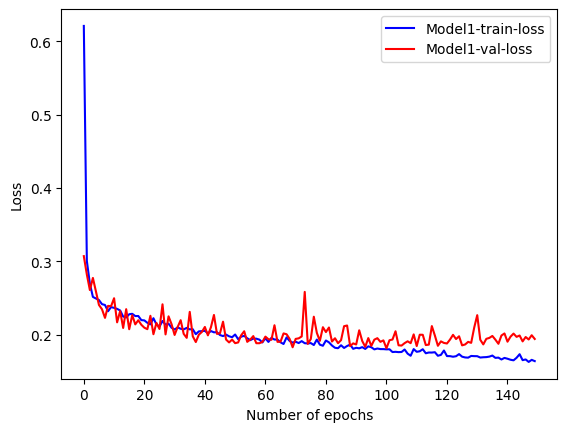

In [169]:
plt.plot(history1.history['loss'], color = "blue", label = "Model1-train-loss")
plt.plot(history1.history['val_loss'], color = "red", label = "Model1-val-loss")
plt.ylabel("Loss")
plt.xlabel("Number of epochs")
plt.legend()
plt.show()

#Model 2 - No Regularization and RMSProp Optimizer

In [184]:
# Build the model
model1 = Sequential()
model1.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(7, activation='softmax'))

# Compile the model
model1.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

start_time2 = time.time()

# Train the model
history2 = model1.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_validation, y_validation))

end_time2 = time.time()

# Calculate and display the training time
training_time = end_time2 - start_time2
print(f"Training time: {training_time} seconds")

Epoch 1/150
298/298 [==============================] - 2s 5ms/step - loss: 0.6016 - accuracy: 0.8013 - val_loss: 0.3655 - val_accuracy: 0.8599
Epoch 2/150
298/298 [==============================] - 1s 4ms/step - loss: 0.3302 - accuracy: 0.8779 - val_loss: 0.3606 - val_accuracy: 0.8712
Epoch 3/150
298/298 [==============================] - 1s 4ms/step - loss: 0.3077 - accuracy: 0.8832 - val_loss: 0.2896 - val_accuracy: 0.8913
Epoch 4/150
298/298 [==============================] - 2s 6ms/step - loss: 0.2838 - accuracy: 0.8973 - val_loss: 0.2802 - val_accuracy: 0.8972
Epoch 5/150
298/298 [==============================] - 2s 6ms/step - loss: 0.2740 - accuracy: 0.9009 - val_loss: 0.3508 - val_accuracy: 0.8585
Epoch 6/150
298/298 [==============================] - 1s 4ms/step - loss: 0.2632 - accuracy: 0.9025 - val_loss: 0.2336 - val_accuracy: 0.9128
Epoch 7/150
298/298 [==============================] - 1s 4ms/step - loss: 0.2611 - accuracy: 0.9028 - val_loss: 0.2563 - val_accuracy: 0.9074

In [186]:
model1.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_124 (Dense)           (None, 256)               4352      
                                                                 
 dense_125 (Dense)           (None, 128)               32896     
                                                                 
 dense_126 (Dense)           (None, 64)                8256      
                                                                 
 dense_127 (Dense)           (None, 7)                 455       
                                                                 
Total params: 45959 (179.53 KB)
Trainable params: 45959 (179.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


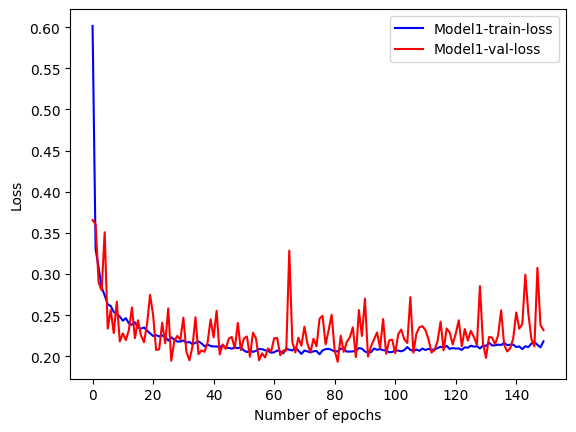

In [187]:
plt.plot(history2.history['loss'], color = "blue", label = "Model1-train-loss")
plt.plot(history2.history['val_loss'], color = "red", label = "Model1-val-loss")
plt.ylabel("Loss")
plt.xlabel("Number of epochs")
plt.legend()
plt.show()

#Model 3 - Dropout regularization and Adam Optimizer

In [174]:
# Build the modele
model_dropout = Sequential()
model_dropout.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model_dropout.add(Dropout(0.1))
model_dropout.add(Dense(128, activation='relu'))
model_dropout.add(Dropout(0.1))
model_dropout.add(Dense(64, activation='relu'))
model_dropout.add(Dense(7, activation='softmax'))

model_dropout.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

start_time3 = time.time()

history3 = model_dropout.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_validation, y_validation))

end_time3 = time.time()

# Calculate and display the training time
training_time = end_time3 - start_time3
print(f"Training time: {training_time} seconds")

Epoch 1/150
298/298 [==============================] - 3s 5ms/step - loss: 0.5926 - accuracy: 0.7883 - val_loss: 0.2962 - val_accuracy: 0.8923
Epoch 2/150
298/298 [==============================] - 1s 4ms/step - loss: 0.3269 - accuracy: 0.8811 - val_loss: 0.2860 - val_accuracy: 0.8923
Epoch 3/150
298/298 [==============================] - 1s 4ms/step - loss: 0.3040 - accuracy: 0.8876 - val_loss: 0.2898 - val_accuracy: 0.8928
Epoch 4/150
298/298 [==============================] - 1s 4ms/step - loss: 0.2868 - accuracy: 0.8945 - val_loss: 0.2435 - val_accuracy: 0.9109
Epoch 5/150
298/298 [==============================] - 2s 5ms/step - loss: 0.2761 - accuracy: 0.8994 - val_loss: 0.2458 - val_accuracy: 0.9099
Epoch 6/150
298/298 [==============================] - 2s 7ms/step - loss: 0.2669 - accuracy: 0.9023 - val_loss: 0.2297 - val_accuracy: 0.9128
Epoch 7/150
298/298 [==============================] - 2s 5ms/step - loss: 0.2636 - accuracy: 0.9052 - val_loss: 0.2369 - val_accuracy: 0.9089

In [179]:
model_dropout.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_112 (Dense)           (None, 256)               4352      
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_113 (Dense)           (None, 128)               32896     
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_114 (Dense)           (None, 64)                8256      
                                                                 
 dense_115 (Dense)           (None, 7)                 455       
                                                                 
Total params: 45959 (179.53 KB)
Trainable params: 459

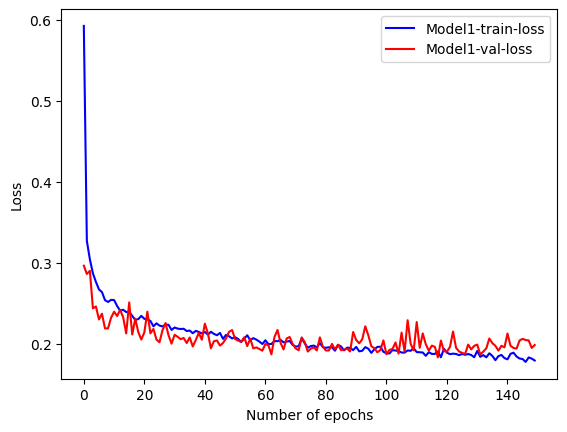

In [180]:
plt.plot(history3.history['loss'], color = "blue", label = "Model1-train-loss")
plt.plot(history3.history['val_loss'], color = "red", label = "Model1-val-loss")
plt.ylabel("Loss")
plt.xlabel("Number of epochs")
plt.legend()
plt.show()

#Model 4 - Dropout regularization and SGD Optimizer

In [188]:
# Build the modele
model_dropout1 = Sequential()
model_dropout1.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model_dropout1.add(Dropout(0.1))
model_dropout1.add(Dense(128, activation='relu'))
model_dropout1.add(Dropout(0.1))
model_dropout1.add(Dense(64, activation='relu'))
model_dropout1.add(Dense(7, activation='softmax'))

model_dropout1.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

start_time4 = time.time()

# Train the model
history4 = model_dropout1.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_validation, y_validation))

end_time4 = time.time()

# Calculate and display the training time
training_time = end_time4 - start_time4
print(f"Training time: {training_time} seconds")

Epoch 1/150
298/298 [==============================] - 2s 5ms/step - loss: 0.6299 - accuracy: 0.7829 - val_loss: 0.3512 - val_accuracy: 0.8697
Epoch 2/150
298/298 [==============================] - 1s 5ms/step - loss: 0.3456 - accuracy: 0.8720 - val_loss: 0.3088 - val_accuracy: 0.8883
Epoch 3/150
298/298 [==============================] - 2s 6ms/step - loss: 0.3145 - accuracy: 0.8845 - val_loss: 0.2778 - val_accuracy: 0.8976
Epoch 4/150
298/298 [==============================] - 2s 7ms/step - loss: 0.2987 - accuracy: 0.8930 - val_loss: 0.3200 - val_accuracy: 0.8815
Epoch 5/150
298/298 [==============================] - 1s 4ms/step - loss: 0.2831 - accuracy: 0.8955 - val_loss: 0.2492 - val_accuracy: 0.9065
Epoch 6/150
298/298 [==============================] - 1s 4ms/step - loss: 0.2759 - accuracy: 0.9022 - val_loss: 0.2538 - val_accuracy: 0.9094
Epoch 7/150
298/298 [==============================] - 1s 4ms/step - loss: 0.2673 - accuracy: 0.9040 - val_loss: 0.2727 - val_accuracy: 0.8962

In [189]:
model_dropout1.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_128 (Dense)           (None, 256)               4352      
                                                                 
 dropout_13 (Dropout)        (None, 256)               0         
                                                                 
 dense_129 (Dense)           (None, 128)               32896     
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_130 (Dense)           (None, 64)                8256      
                                                                 
 dense_131 (Dense)           (None, 7)                 455       
                                                                 
Total params: 45959 (179.53 KB)
Trainable params: 459

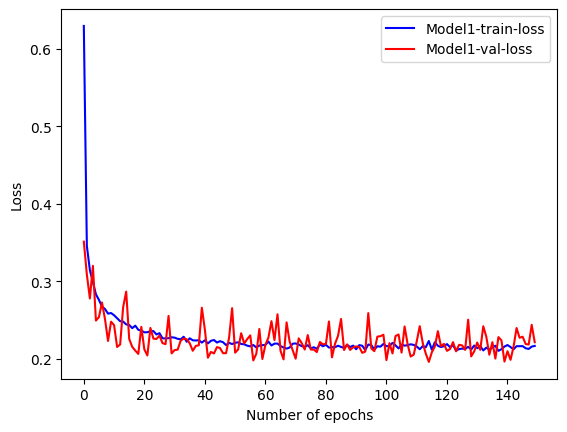

In [190]:
plt.plot(history4.history['loss'], color = "blue", label = "Model1-train-loss")
plt.plot(history4.history['val_loss'], color = "red", label = "Model1-val-loss")
plt.ylabel("Loss")
plt.xlabel("Number of epochs")
plt.legend()
plt.show()

#Model 5 - Batch Normalization Regularization and Adam Optimizer

In [191]:
model_batch_norm = Sequential()
model_batch_norm.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model_batch_norm.add(BatchNormalization())  # Batch normalization layer
model_batch_norm.add(Dense(128, activation='relu'))
model_batch_norm.add(BatchNormalization())
model_batch_norm.add(Dense(64, activation='relu'))
model_batch_norm.add(BatchNormalization())
model_batch_norm.add(Dense(7, activation='softmax'))
model_batch_norm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

start_time5 = time.time()

# Train the model
history5 = model_batch_norm.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_validation, y_validation))

end_time5 = time.time()

# Calculate and display the training time
training_time = end_time5 - start_time5
print(f"Training time: {training_time} seconds")

Epoch 1/150
298/298 [==============================] - 4s 6ms/step - loss: 0.3518 - accuracy: 0.8808 - val_loss: 1.1044 - val_accuracy: 0.5186
Epoch 2/150
298/298 [==============================] - 2s 6ms/step - loss: 0.2865 - accuracy: 0.8985 - val_loss: 0.2937 - val_accuracy: 0.8947
Epoch 3/150
298/298 [==============================] - 2s 8ms/step - loss: 0.2694 - accuracy: 0.9004 - val_loss: 0.2868 - val_accuracy: 0.8908
Epoch 4/150
298/298 [==============================] - 2s 7ms/step - loss: 0.2566 - accuracy: 0.9075 - val_loss: 0.2585 - val_accuracy: 0.9104
Epoch 5/150
298/298 [==============================] - 2s 6ms/step - loss: 0.2600 - accuracy: 0.9025 - val_loss: 0.3292 - val_accuracy: 0.8815
Epoch 6/150
298/298 [==============================] - 2s 5ms/step - loss: 0.2540 - accuracy: 0.9082 - val_loss: 0.1980 - val_accuracy: 0.9275
Epoch 7/150
298/298 [==============================] - 1s 5ms/step - loss: 0.2438 - accuracy: 0.9128 - val_loss: 0.2780 - val_accuracy: 0.8986

In [192]:
model_batch_norm.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_132 (Dense)           (None, 256)               4352      
                                                                 
 batch_normalization_12 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 dense_133 (Dense)           (None, 128)               32896     
                                                                 
 batch_normalization_13 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dense_134 (Dense)           (None, 64)                8256      
                                                                 
 batch_normalization_14 (Ba  (None, 64)              

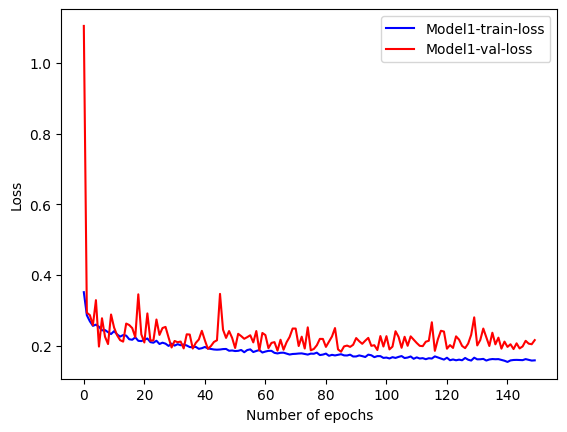

In [194]:
plt.plot(history5.history['loss'], color = "blue", label = "Model1-train-loss")
plt.plot(history5.history['val_loss'], color = "red", label = "Model1-val-loss")
plt.ylabel("Loss")
plt.xlabel("Number of epochs")
plt.legend()
plt.show()

#Model 6 - Batch Normalization Regularization and SGD Optimizer

In [198]:
model_batch_norm1 = Sequential()
model_batch_norm1.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model_batch_norm1.add(BatchNormalization())  # Batch normalization layer
model_batch_norm1.add(Dense(128, activation='relu'))
model_batch_norm1.add(BatchNormalization())
model_batch_norm1.add(Dense(64, activation='relu'))
model_batch_norm1.add(Dense(7, activation='softmax'))
model_batch_norm1.compile(optimizer='RMSProp', loss='categorical_crossentropy', metrics=['accuracy'])

start_time6 = time.time()

# Train the model
history6 = model_batch_norm1.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_validation, y_validation))

end_time6 = time.time()

# Calculate and display the training time
training_time = end_time6 - start_time6
print(f"Training time: {training_time} seconds")

Epoch 1/150
298/298 [==============================] - 3s 5ms/step - loss: 0.3314 - accuracy: 0.8850 - val_loss: 0.9372 - val_accuracy: 0.6675
Epoch 2/150
298/298 [==============================] - 2s 6ms/step - loss: 0.2791 - accuracy: 0.9004 - val_loss: 0.2549 - val_accuracy: 0.9079
Epoch 3/150
298/298 [==============================] - 1s 4ms/step - loss: 0.2762 - accuracy: 0.8973 - val_loss: 0.3689 - val_accuracy: 0.8751
Epoch 4/150
298/298 [==============================] - 1s 4ms/step - loss: 0.2602 - accuracy: 0.9079 - val_loss: 0.2778 - val_accuracy: 0.8932
Epoch 5/150
298/298 [==============================] - 2s 6ms/step - loss: 0.2593 - accuracy: 0.9043 - val_loss: 0.2232 - val_accuracy: 0.9177
Epoch 6/150
298/298 [==============================] - 2s 7ms/step - loss: 0.2506 - accuracy: 0.9066 - val_loss: 0.2102 - val_accuracy: 0.9251
Epoch 7/150
298/298 [==============================] - 1s 5ms/step - loss: 0.2453 - accuracy: 0.9104 - val_loss: 0.2804 - val_accuracy: 0.8991

In [196]:
model_batch_norm1.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_136 (Dense)           (None, 256)               4352      
                                                                 
 batch_normalization_15 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 dense_137 (Dense)           (None, 128)               32896     
                                                                 
 batch_normalization_16 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dense_138 (Dense)           (None, 64)                8256      
                                                                 
 dense_139 (Dense)           (None, 7)               

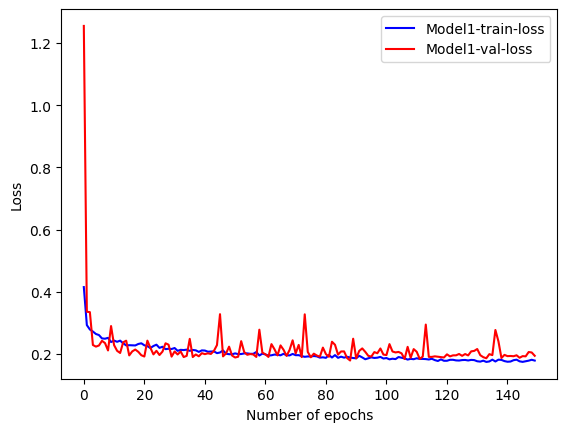

In [197]:
plt.plot(history6.history['loss'], color = "blue", label = "Model1-train-loss")
plt.plot(history6.history['val_loss'], color = "red", label = "Model1-val-loss")
plt.ylabel("Loss")
plt.xlabel("Number of epochs")
plt.legend()
plt.show()

#Model 7 - Early Stopping Regularization and Adam Optimizer

In [201]:
# Model with Early Stopping
model_early_stop = Sequential()
model_early_stop.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model_early_stop.add(Dense(128, activation='relu'))
model_early_stop.add(Dense(64, activation='relu'))
model_early_stop.add(Dense(7, activation='softmax'))
model_early_stop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint1 = ModelCheckpoint("best_model1", monitor="val_loss", save_best_only=True, mode="min")

start_time7 = time.time()

# Train the model with early stopping
history7 = model_early_stop.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_validation, y_validation),
                                          callbacks=[early_stopping,checkpoint1])

end_time7 = time.time()

# Calculate and display the training time
training_time = end_time7 - start_time7
print(f"Training time: {training_time} seconds")

Epoch 1/150
298/298 [==============================] - 3s 8ms/step - loss: 0.5893 - accuracy: 0.7819 - val_loss: 0.3196 - val_accuracy: 0.8815
Epoch 2/150
298/298 [==============================] - 3s 9ms/step - loss: 0.3058 - accuracy: 0.8886 - val_loss: 0.2733 - val_accuracy: 0.8991
Epoch 3/150
298/298 [==============================] - 3s 10ms/step - loss: 0.2810 - accuracy: 0.8966 - val_loss: 0.2530 - val_accuracy: 0.9035
Epoch 4/150
298/298 [==============================] - 1s 4ms/step - loss: 0.2573 - accuracy: 0.9039 - val_loss: 0.2729 - val_accuracy: 0.9035
Epoch 5/150
298/298 [==============================] - 3s 9ms/step - loss: 0.2520 - accuracy: 0.9100 - val_loss: 0.2242 - val_accuracy: 0.9163
Epoch 6/150
298/298 [==============================] - 1s 4ms/step - loss: 0.2442 - accuracy: 0.9122 - val_loss: 0.2446 - val_accuracy: 0.9114
Epoch 7/150
298/298 [==============================] - 1s 4ms/step - loss: 0.2361 - accuracy: 0.9141 - val_loss: 0.2396 - val_accuracy: 0.907

In [202]:
model_early_stop.summary()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_148 (Dense)           (None, 256)               4352      
                                                                 
 dense_149 (Dense)           (None, 128)               32896     
                                                                 
 dense_150 (Dense)           (None, 64)                8256      
                                                                 
 dense_151 (Dense)           (None, 7)                 455       
                                                                 
Total params: 45959 (179.53 KB)
Trainable params: 45959 (179.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


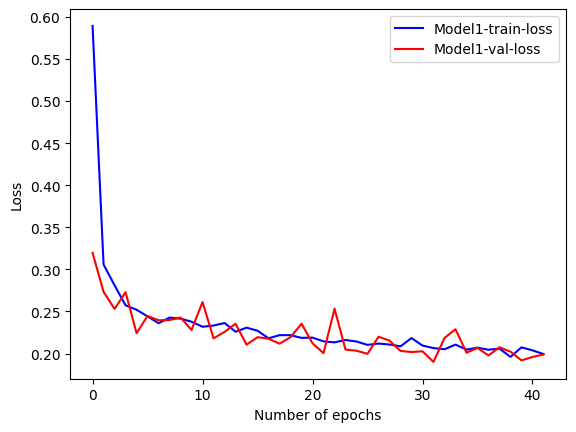

In [204]:
plt.plot(history7.history['loss'], color = "blue", label = "Model1-train-loss")
plt.plot(history7.history['val_loss'], color = "red", label = "Model1-val-loss")
plt.ylabel("Loss")
plt.xlabel("Number of epochs")
plt.legend()
plt.show()

#Model 8 - Early Stopping Regularization and SGD Optimizer

In [205]:
# Model with Early Stopping
model_early_stop1 = Sequential()
model_early_stop1.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model_early_stop1.add(Dense(128, activation='relu'))
model_early_stop1.add(Dense(64, activation='relu'))
model_early_stop1.add(Dense(7, activation='softmax'))
model_early_stop1.compile(optimizer='RMSProp', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint2 = ModelCheckpoint("best_model2", monitor="val_loss", save_best_only=True, mode="min")


start_time8 = time.time()

# Train the model with early stopping
history8 = model_early_stop1.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_validation, y_validation),
                                          callbacks=[early_stopping])

end_time8 = time.time()

# Calculate and display the training time
training_time = end_time8 - start_time8
print(f"Training time: {training_time} seconds")

Epoch 1/150
298/298 [==============================] - 2s 5ms/step - loss: 0.5737 - accuracy: 0.7976 - val_loss: 0.3704 - val_accuracy: 0.8580
Epoch 2/150
298/298 [==============================] - 1s 4ms/step - loss: 0.3299 - accuracy: 0.8790 - val_loss: 0.2754 - val_accuracy: 0.8986
Epoch 3/150
298/298 [==============================] - 1s 4ms/step - loss: 0.3015 - accuracy: 0.8901 - val_loss: 0.2795 - val_accuracy: 0.9050
Epoch 4/150
298/298 [==============================] - 1s 4ms/step - loss: 0.2826 - accuracy: 0.8985 - val_loss: 0.2605 - val_accuracy: 0.9011
Epoch 5/150
298/298 [==============================] - 1s 4ms/step - loss: 0.2720 - accuracy: 0.9018 - val_loss: 0.2822 - val_accuracy: 0.8981
Epoch 6/150
298/298 [==============================] - 1s 4ms/step - loss: 0.2655 - accuracy: 0.9039 - val_loss: 0.2551 - val_accuracy: 0.9045
Epoch 7/150
298/298 [==============================] - 2s 6ms/step - loss: 0.2575 - accuracy: 0.9048 - val_loss: 0.2286 - val_accuracy: 0.9216

In [206]:
model_early_stop1.summary()

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_152 (Dense)           (None, 256)               4352      
                                                                 
 dense_153 (Dense)           (None, 128)               32896     
                                                                 
 dense_154 (Dense)           (None, 64)                8256      
                                                                 
 dense_155 (Dense)           (None, 7)                 455       
                                                                 
Total params: 45959 (179.53 KB)
Trainable params: 45959 (179.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


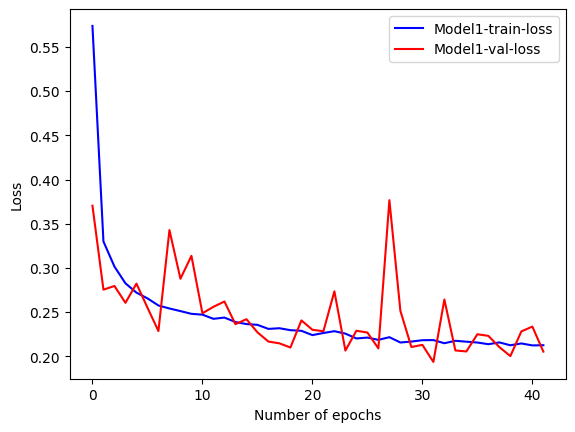

In [207]:
plt.plot(history8.history['loss'], color = "blue", label = "Model1-train-loss")
plt.plot(history8.history['val_loss'], color = "red", label = "Model1-val-loss")
plt.ylabel("Loss")
plt.xlabel("Number of epochs")
plt.legend()
plt.show()

#Best Performing Model - evaluation (Model 3)

In [208]:
X_combined = np.concatenate((X_train, X_validation), axis=0)
y_combined = np.concatenate((y_train, y_validation), axis=0)

In [212]:
# Build the modele
model_dropout = Sequential()
model_dropout.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model_dropout.add(Dropout(0.1))
model_dropout.add(Dense(128, activation='relu'))
model_dropout.add(Dropout(0.1))
model_dropout.add(Dense(64, activation='relu'))
model_dropout.add(Dense(7, activation='softmax'))

model_dropout.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

start_time3 = time.time()

history3 = model_dropout.fit(X_combined, y_combined, epochs=150, batch_size=32, validation_data=(X_validation, y_validation))

end_time3 = time.time()

# Calculate and display the training time
training_time = end_time3 - start_time3
print(f"Training time: {training_time} seconds")

Epoch 1/150
362/362 [==============================] - 2s 4ms/step - loss: 0.5553 - accuracy: 0.7954 - val_loss: 0.2862 - val_accuracy: 0.8937
Epoch 2/150
362/362 [==============================] - 1s 3ms/step - loss: 0.3163 - accuracy: 0.8838 - val_loss: 0.2641 - val_accuracy: 0.9070
Epoch 3/150
362/362 [==============================] - 1s 3ms/step - loss: 0.2782 - accuracy: 0.9009 - val_loss: 0.2336 - val_accuracy: 0.9104
Epoch 4/150
362/362 [==============================] - 1s 3ms/step - loss: 0.2717 - accuracy: 0.9025 - val_loss: 0.2315 - val_accuracy: 0.9109
Epoch 5/150
362/362 [==============================] - 1s 3ms/step - loss: 0.2635 - accuracy: 0.9041 - val_loss: 0.2281 - val_accuracy: 0.9104
Epoch 6/150
362/362 [==============================] - 1s 3ms/step - loss: 0.2543 - accuracy: 0.9048 - val_loss: 0.2509 - val_accuracy: 0.9074
Epoch 7/150
362/362 [==============================] - 2s 5ms/step - loss: 0.2579 - accuracy: 0.9070 - val_loss: 0.2138 - val_accuracy: 0.9231

In [213]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


64/64 [==============================] - 1s 6ms/step - loss: 0.2246 - accuracy: 0.9207
Test Loss: 0.2246
Test Accuracy: 0.9207


In [215]:
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

64/64 [==============================] - 1s 8ms/step
Confusion Matrix:
[[181   0   9   0   0   1   6]
 [  0  83   0   0   0   0   0]
 [ 13   0 222   0   3   0   2]
 [  0   0   0 508   0  12  14]
 [  0   0   3   5 270   0   9]
 [  3   0   0   8   0 279   6]
 [  3   0   1  54   5   5 337]]


In [216]:
# Display classification report
class_report = classification_report(y_true_classes, y_pred_classes)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       197
           1       1.00      1.00      1.00        83
           2       0.94      0.93      0.93       240
           3       0.88      0.95      0.92       534
           4       0.97      0.94      0.96       287
           5       0.94      0.94      0.94       296
           6       0.90      0.83      0.87       405

    accuracy                           0.92      2042
   macro avg       0.93      0.93      0.93      2042
weighted avg       0.92      0.92      0.92      2042

